# Sorting Arrays

**지금까지 NumPy를 사용하여 배열 데이터에 액세스하고이를 조작하는 도구에 주로 관심을 기울였습니다. 이 절에서는 NumPy 배열의 값 정렬과 관련된 알고리즘을 다룹니다. 이러한 알고리즘은 입문 컴퓨터 과학 과정에서 가장 많이 사용되는 주제입니다. 하나를 선택했다면 삽입 유형, 선택 정렬, 병합 정렬, 빠른 정렬, 버블 정렬에 대한 꿈 (또는 기질, 악몽에 따라)이 있었을 것입니다 , 그리고 많은, 더 많은. 모두 비슷한 작업을 수행하는 방법입니다. 목록 또는 배열에서 값을 정렬합니다.**

For example, a simple selection sort repeatedly finds the minimum value from a list, and makes swaps until the list is sorted. We can code this in just a few lines of Python:

In [3]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [4]:
x = np.array([2, 1, 4, 3, 5])

In [7]:
selection_sort(x)


array([1, 2, 3, 4, 5])

As any first-year computer science major will tell you, the selection sort is useful for its simplicity, but is much too slow to be useful for larger arrays. For a list of **N** values, it requires **N** loops, each of which does on order **∼N** comparisons to find the swap value. In terms of the **"big-O"** notation often used to characterize these algorithms (see Big-O Notation), selection sort averages **O[N^2]**: if you double the number of items in the list, the execution time will go up by about a factor of four.

Even selection sort, though, is much better than my all-time favorite sorting algorithms, the bogosort:

In [8]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [9]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

이 어리석은 정렬 방법은 순수한 기회에 의존합니다. 결과가 정렬 될 때까지 반복적으로 배열을 임의로 적용합니다. O [N × N!] 의 평균 스케일링 (N × N 팩토리얼)을 사용하면 실제 계산에 절대 사용해서는 안됩니다.

다행스럽게도 Python에는 방금 설명한 단순 알고리즘보다 훨씬 더 효율적인 내장 정렬 알고리즘이 포함되어 있습니다. 먼저 파이썬 내장 함수를 살펴보고 NumPy에 포함되어 있고 NumPy 배열에 최적화 된 루틴을 살펴 보겠습니다.

In [48]:
np.random.shuffle(x)
x

array([5, 2, 4, 1, 3])

# Fast Sorting in NumPy: *np.sort* and *np.argsort*
Although Python has built-in sort and sorted functions to work with lists, we won't discuss them here because NumPy's np.sort function turns out to be much more efficient and useful for our purposes. By default np.sort uses an O[Nlog⁡N], quicksort algorithm, though mergesort and heapsort are also available. For most applications, the default quicksort is more than sufficient.

To return a sorted version of the array without modifying the input, you can use np.sort:


In [49]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

**If you prefer to sort the array in-place, you can instead use the |*sort*| method of arrays**

In [54]:
x.sort()
print(x)

[1 2 3 4 5]


**A related function is |*argsort*|, which instead returns the indices of the sorted elements:**

In [55]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


**The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on. These indices can then be used (via fancy indexing) to construct the sorted array if desired**

In [56]:
x[i]

array([1, 2, 3, 4, 5])

## 1.1 Sorting along rows or columnsm

**NumPy의 정렬 알고리즘의 유용한 기능은 축 인수를 사용하여 다차원 배열의 특정 행이나 열을 정렬 할 수있는 기능입니다. 예 :**

In [57]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [58]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [60]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

# 2. Partial Sorts: Partitimoning

**때로는 전체 배열을 정렬하는 데 관심이 없지만 배열에서 가장 작은 k 개의 값을 찾고 싶을 때가 있습니다. NumPy는 np.partition 함수에서이를 제공합니다. np.partition은 배열과 숫자 K를 취합니다. 결과는 파티션의 왼쪽에 가장 작은 K 값을 갖는 새로운 배열이고 오른쪽에있는 나머지 값은 임의의 순서로 나타납니다.**

In [68]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [69]:
np.partition(x, 5)

array([2, 1, 3, 4, 5, 6, 7])

** 결과 배열의 처음 세 값은 배열에서 가장 작은 세 개의 값이고 나머지 배열 위치는 나머지 값을 포함합니다. 두 개의 파티션 내에서 요소는 임의의 순서를가집니다.**

**정렬과 마찬가지로 다차원 배열의 임의의 축을 따라 분할 할 수 있습니다.**

In [66]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

# 3. Example: k-Nearest Neighbors

Let's quickly see how we might use this argsort function along multiple axes to find the nearest neighbors of each point in a set. We'll start by creating a random set of 10 points on a two-dimensional plane. Using the standard convention, we'll arrange these in a 10×2 array:

In [77]:
X = rand.rand(10, 2)
X

array([[ 0.92630088,  0.65107703],
       [ 0.91495968,  0.85003858],
       [ 0.44945067,  0.09541012],
       [ 0.37081825,  0.66884125],
       [ 0.66592236,  0.59129779],
       [ 0.27472179,  0.56124343],
       [ 0.38292687,  0.9717121 ],
       [ 0.84891382,  0.72172952],
       [ 0.23598492,  0.25606832],
       [ 0.04043359,  0.71066289]])

To get an idea of how these points look, let's quickly scatter plot them:

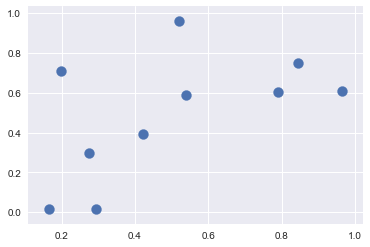

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [95]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)


이 작업은 많은 작업이 포함되어 있으며 NumPy의 방송 규칙에 익숙하지 않은 경우 조금 혼란 스러울 수 있습니다. 이와 같은 코드를 발견하면 구성 단계로 분류하는 것이 유용 할 수 있습니다.


In [99]:
# 1.for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [101]:
# 2. square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [103]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

**Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:**

In [106]:
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])


그것은 밖으로 체크 아웃! pairwise square-distance를 변환하면 np.argsort를 사용하여 각 행을 정렬 할 수 있습니다. 맨 왼쪽 열은 가장 가까운 이웃의 색인을 제공합니다.

In [107]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 7 1 4 3 6 5 2 8 9]
 [1 7 0 4 6 3 5 9 2 8]
 [2 8 5 4 3 0 9 7 6 1]
 [3 5 6 4 9 8 7 0 1 2]
 [4 7 0 3 1 5 6 2 8 9]
 [5 3 9 8 4 6 2 7 0 1]
 [6 3 5 9 4 7 1 0 8 2]
 [7 0 1 4 3 6 5 2 8 9]
 [8 2 5 3 9 4 6 7 0 1]
 [9 5 3 6 8 4 2 7 1 0]]


In [109]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

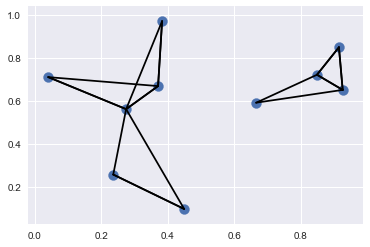

In [110]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

# Aside: Big-O Notation